In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
import copy

from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [2]:
data = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')



# Data Preprocessing

In [3]:
test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [4]:
data.head()
data.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [5]:
print(f"Rows in dataset are : {data.shape[0]} \nColumns in dataset are : {data.shape[1]}")

Rows in dataset are : 6019 
Columns in dataset are : 14


In [6]:
data.describe()

Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000

In [7]:
data.shape

(6019, 14)

In [8]:
test.describe()

Unnamed: 0         Year  Kilometers_Driven        Seats
count  1234.000000  1234.000000        1234.000000  1223.000000
mean    616.500000  2013.400324       58507.288493     5.284546
std     356.369424     3.179700       35598.702098     0.825622
min       0.000000  1996.000000        1000.000000     2.000000
25%     308.250000  2011.000000       34000.000000     5.000000
50%     616.500000  2014.000000       54572.500000     5.000000
75%     924.750000  2016.000000       75000.000000     5.000000
max    1233.000000  2019.000000      350000.000000    10.000000

In [9]:
test.shape

(1234, 13)

In [10]:
listtrain = data['Name']
listtest = data['Name']
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [11]:
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [12]:
data = data.drop('New_Price', axis=1)
data = data.dropna(how='any')


In [13]:
listtrain = data['Name']
listtest = test['Name']
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'BMW X3 2.5si', 'BMW 7 Series 740i Sedan', 'Ford EcoSport 1.5 Petrol Ambiente', 'Toyota Innova 2.5 LE 2014 Diesel 8 Seater', 'Hyundai i20 2015-2017 1.4 CRDi Sportz', 'Hyundai Santro Xing XG AT eRLX Euro III', 'Honda Jazz VX CVT', 'Ford Ikon 1.4 ZXi', 'Fiat Punto EVO 1.3 Emotion', 'Mahindra Xylo H9', 'Mahindra Scorpio S10 8 Seater', 'Nissan 370Z AT', 'Hyundai i20 1.4 Asta AT (O) with Sunroof', 'Mahindra Bolero SLX', 'Hyundai EON 1.0 Kappa Magna Plus', 'Fiat Avventura Urban Cross 1.3 Multijet Emotion', 'Ford Endeavour 3.0L AT 4x2', 'Hindustan Motors Contessa 2.0 DSL', 'Maruti Versa DX2', 'Maruti Swift 1.3 VXi', 'Renault Lodgy 110PS RxL', 'Mahindra KUV 100 mFALCON G80 K4 5str', 'Hyundai Sonata Embera 2.4L MT', 'BMW 5 Series 530i Sport Line', 'Bentley Flying Spur W12', 'Tata Tiago AMT 1.2 Revotron XTA', 'Maruti Ertiga VXI Petrol', 'Maruti Vitara Brezza ZDi Plus AMT', 'Tata Indica Vista Aqua TDI BSIII', 'Honda CR-V Diesel', 'Toyota Etios Liva Diesel TRD Sporti

In [14]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [15]:
set(test['Cars']).issubset(set(data['Cars']))

False

In [16]:
listtrain = data['Cars']
listtest = test['Cars']
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Nissan 370Z', 'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi', 'Toyota Land', 'Fiat Abarth', 'Hindustan Motors'}


In [17]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z', 
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [18]:
listtrain = data['Cars']
listtest = test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [19]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

In [20]:
data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [21]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)


In [22]:
data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [23]:
test = test.drop('New_Price', axis=1)
test = test.dropna(how='any')

In [24]:
test = test.drop('Unnamed: 0', axis=1)

In [25]:
test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [26]:
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [27]:
test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [28]:
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [29]:
data.dtypes
test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Cars                  object
dtype: object

In [30]:
dffeature=['Cars','Location','Year', 'Kilometers_Driven','Fuel_Type','Transmission', 
           'Owner_Type','Mileage','Engine','Power','Seats','Price']
data = pd.DataFrame(data, columns=dffeature)

testfeature = ['Cars','Location','Year','Kilometers_Driven','Fuel_Type','Transmission', 
            'Owner_Type','Mileage','Engine','Power','Seats']
test = pd.DataFrame(test, columns=testfeature)

# Data Analysis

C:\Users\hp\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

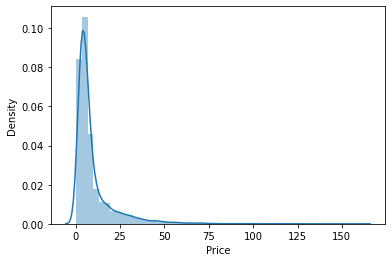

In [31]:
sns.distplot(data['Price'])


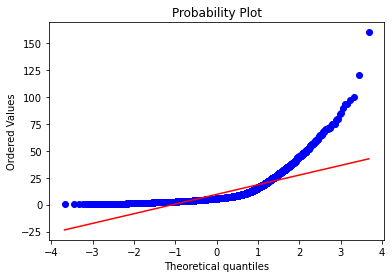

In [32]:
res = stats.probplot(data['Price'], plot=plt)

In [33]:
 # finding features relative to target Price
correlation = data.corr()
correlation.sort_values(["Price"], ascending = False, inplace = True)
print(correlation.Price)

Price                1.000000
Power                0.769351
Engine               0.659117
Year                 0.305800
Seats                0.052262
Kilometers_Driven   -0.011263
Mileage             -0.313877
Name: Price, dtype: float64


In [34]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type', 
           values='Price', title='Price vs Fuel_type')

C:\Users\hp\Documents\anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


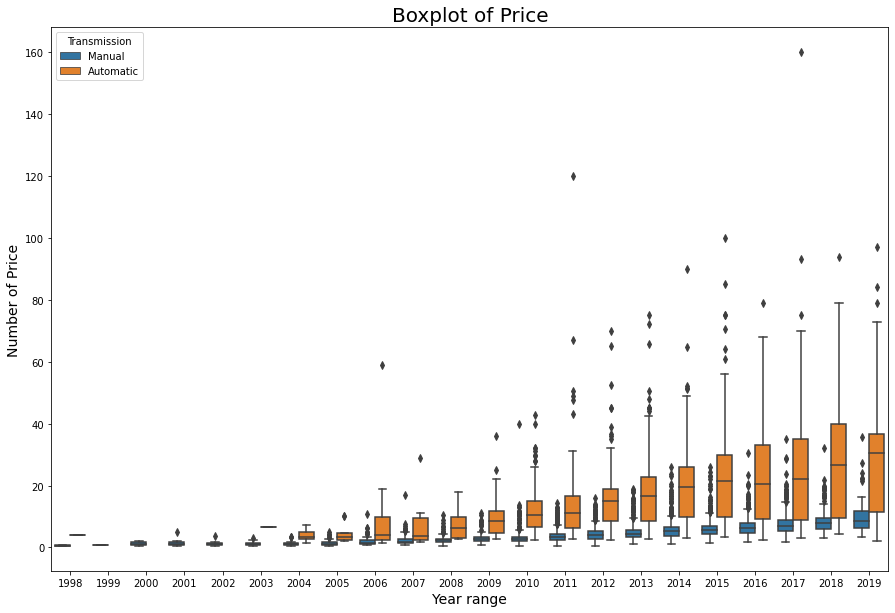

In [35]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [36]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")


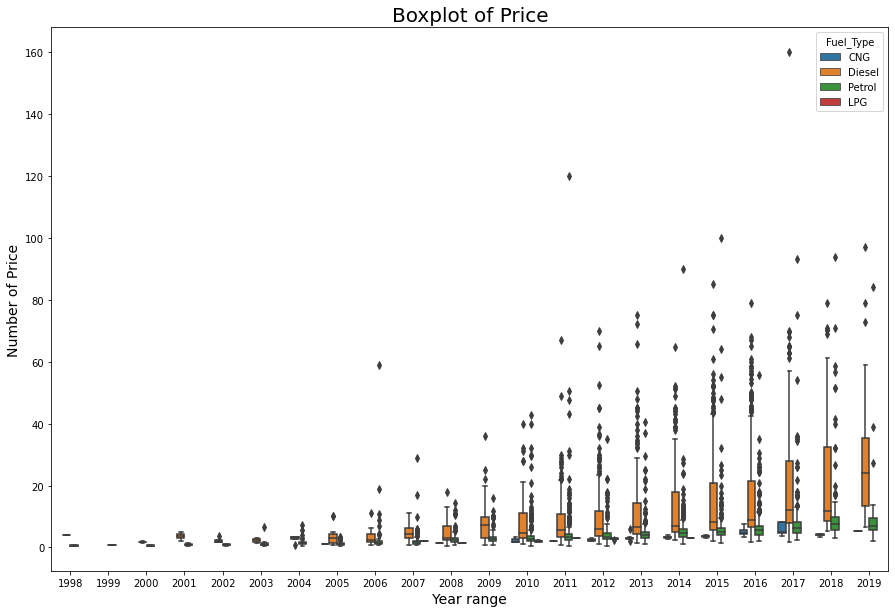

In [37]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [38]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [39]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

# Model fitting 

In [40]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [42]:
df_test.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   106         4          0             1           0  2014   
1   106         3          3             1           2  2013   

   Kilometers_Driven  Mileage  Engine  Power  Seats  
0              40929    32.26   998.0   58.2    4.0  
1              54493    24.70   796.0   47.3    5.0

In [43]:
df_train.head(2)

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   124         9          0             1           0  2010   
1    65        10          1             1           0  2015   

   Kilometers_Driven  Mileage  Engine   Power  Seats  Price  
0              72000    26.60   998.0   58.16    5.0   1.75  
1              41000    19.67  1582.0  126.20    5.0  12.50

In [44]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

In [45]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\499864558.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



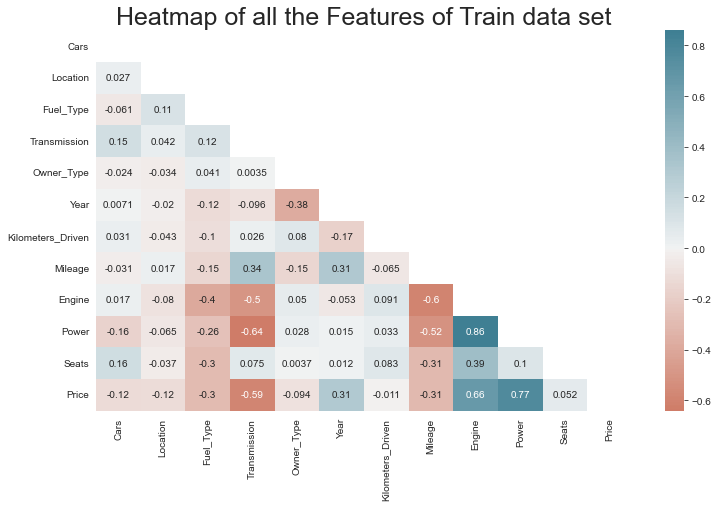

In [46]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [47]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [48]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\2668011190.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\2668011190.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\2668011190.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\2668011190.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\2668011190.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Us

In [49]:
Acc.sort_values(by='Accuracy on Testing set')

model Root Mean Squared  Error Accuracy on Traing set  \
3           MLPRegressor               221.556854               0.723879   
4      AdaBoostRegressor               149.051901               0.833467   
0  DecisionTreeRegressor               112.453288               0.999993   
2  RandomForestRegressor                84.082081               0.991769   
5    ExtraTreesRegressor                80.449798               0.999993   
1           XGBRegressor                74.815814               0.994635   

  Accuracy on Testing set  
3                0.591211  
4                0.814986  
0                0.894689  
2                0.941124  
5                0.946101  
1                0.953386

		Error Table
Mean Absolute Error      :  56.00904211404311
Mean Squared  Error      :  6238.945280940112
Root Mean Squared  Error :  78.98699437844253
Accuracy on Traing set   :  0.9926393788288773
Accuracy on Testing set  :  0.9480435010092333


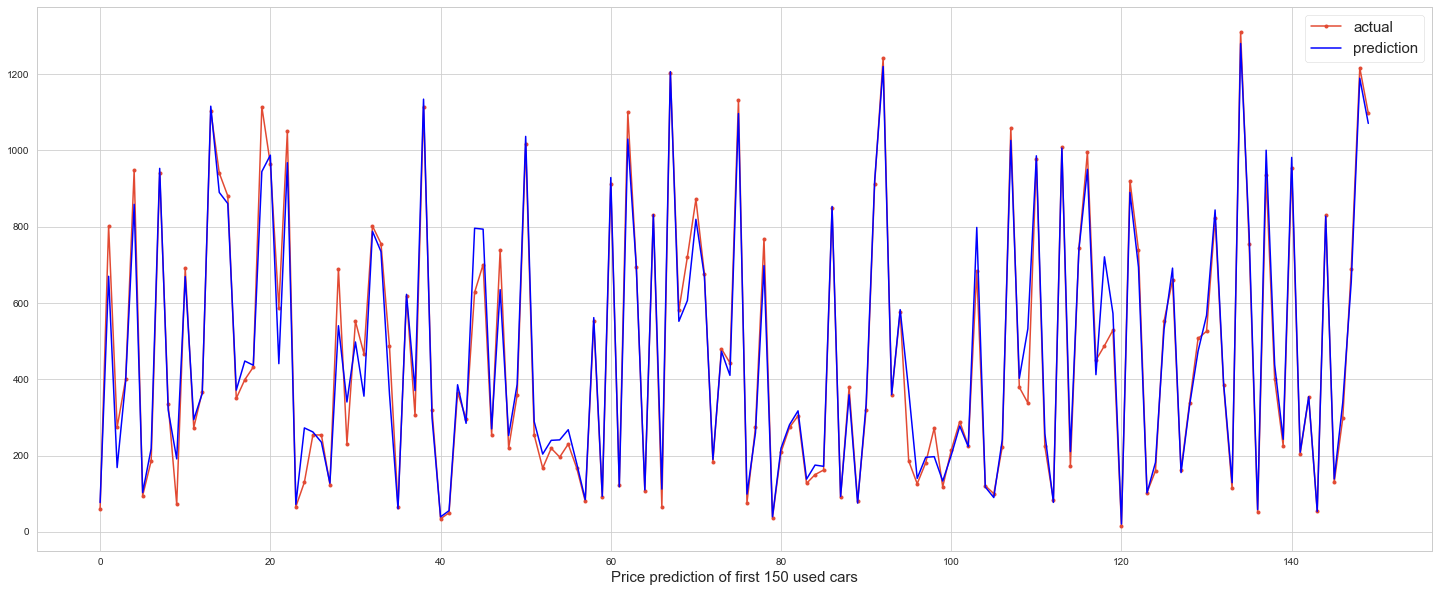

In [50]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  47.05285207381301
Mean Squared  Error      :  4775.906080512007
Root Mean Squared  Error :  69.10793066292759
Accuracy on Traing set   :  0.9947381034525249
Accuracy on Testing set  :  0.9602273544199561


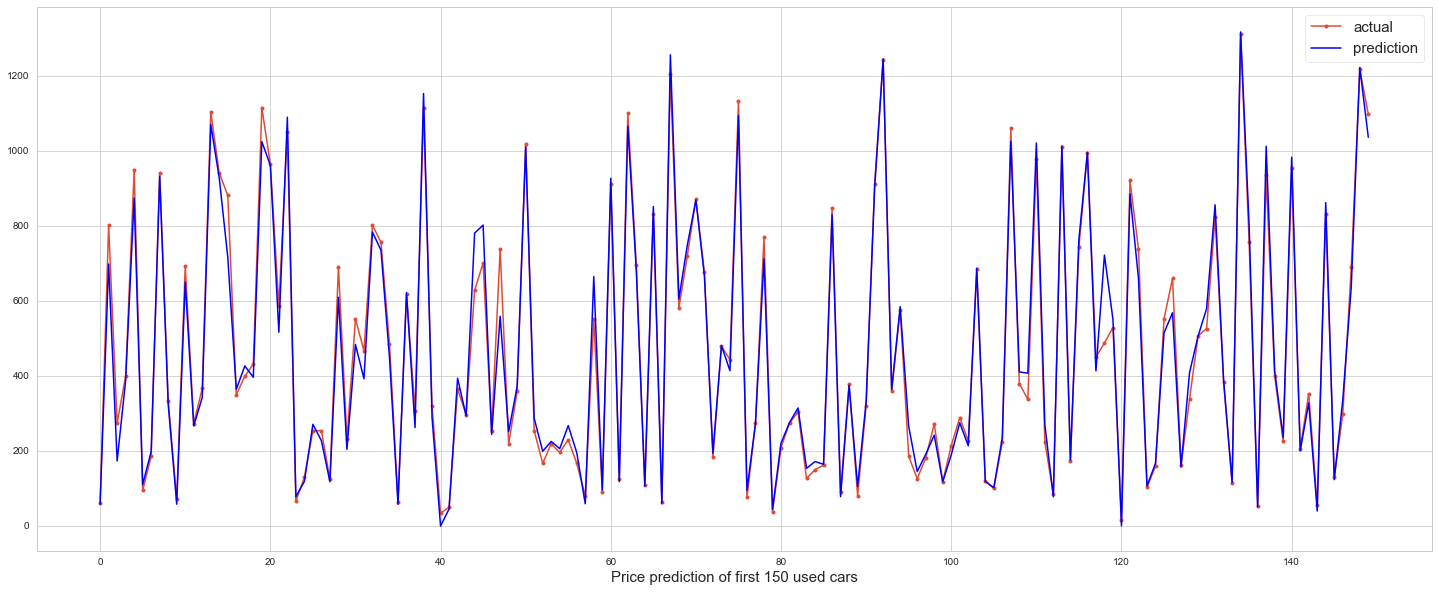

In [51]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [52]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

0:	learn: 345.6209555	total: 179ms	remaining: 29m 45s
1:	learn: 340.5798029	total: 184ms	remaining: 15m 17s
2:	learn: 335.4172116	total: 188ms	remaining: 10m 27s
3:	learn: 330.4256615	total: 193ms	remaining: 8m 2s
4:	learn: 325.3055417	total: 198ms	remaining: 6m 35s
5:	learn: 320.2643598	total: 202ms	remaining: 5m 37s
6:	learn: 315.4987069	total: 209ms	remaining: 4m 58s
7:	learn: 310.9374902	total: 214ms	remaining: 4m 26s
8:	learn: 306.3487714	total: 218ms	remaining: 4m 2s
9:	learn: 301.8586451	total: 223ms	remaining: 3m 42s
10:	learn: 297.4062292	total: 227ms	remaining: 3m 26s
11:	learn: 293.1492281	total: 232ms	remaining: 3m 12s
12:	learn: 288.9032681	total: 236ms	remaining: 3m 1s
13:	learn: 284.6983842	total: 241ms	remaining: 2m 51s
14:	learn: 280.7840875	total: 245ms	remaining: 2m 43s
15:	learn: 276.8911780	total: 250ms	remaining: 2m 35s
16:	learn: 272.8694885	total: 254ms	remaining: 2m 29s
17:	learn: 269.0154973	total: 259ms	remaining: 2m 23s
18:	learn: 265.4211213	total: 263ms	re

190:	learn: 97.8745816	total: 849ms	remaining: 43.6s
191:	learn: 97.7096224	total: 853ms	remaining: 43.6s
192:	learn: 97.5369678	total: 857ms	remaining: 43.5s
193:	learn: 97.4224155	total: 861ms	remaining: 43.5s
194:	learn: 97.2962535	total: 864ms	remaining: 43.5s
195:	learn: 97.1717534	total: 868ms	remaining: 43.4s
196:	learn: 97.0442637	total: 871ms	remaining: 43.4s
197:	learn: 96.9349501	total: 875ms	remaining: 43.3s
198:	learn: 96.8131016	total: 879ms	remaining: 43.3s
199:	learn: 96.6923784	total: 882ms	remaining: 43.2s
200:	learn: 96.5312041	total: 886ms	remaining: 43.2s
201:	learn: 96.4192353	total: 890ms	remaining: 43.2s
202:	learn: 96.3131850	total: 894ms	remaining: 43.2s
203:	learn: 96.1987935	total: 898ms	remaining: 43.1s
204:	learn: 96.0966917	total: 901ms	remaining: 43.1s
205:	learn: 95.9992484	total: 904ms	remaining: 43s
206:	learn: 95.8958414	total: 907ms	remaining: 42.9s
207:	learn: 95.7790528	total: 911ms	remaining: 42.9s
208:	learn: 95.6910673	total: 914ms	remaining: 4

371:	learn: 83.3782848	total: 1.5s	remaining: 38.9s
372:	learn: 83.3590670	total: 1.5s	remaining: 38.8s
373:	learn: 83.2706037	total: 1.51s	remaining: 38.8s
374:	learn: 83.2238623	total: 1.51s	remaining: 38.8s
375:	learn: 83.1978758	total: 1.51s	remaining: 38.8s
376:	learn: 83.1595865	total: 1.52s	remaining: 38.8s
377:	learn: 83.0621961	total: 1.52s	remaining: 38.8s
378:	learn: 83.0245701	total: 1.53s	remaining: 38.8s
379:	learn: 82.9697354	total: 1.53s	remaining: 38.7s
380:	learn: 82.9420083	total: 1.53s	remaining: 38.7s
381:	learn: 82.9043315	total: 1.54s	remaining: 38.8s
382:	learn: 82.8472908	total: 1.54s	remaining: 38.7s
383:	learn: 82.7996704	total: 1.54s	remaining: 38.7s
384:	learn: 82.7280307	total: 1.55s	remaining: 38.7s
385:	learn: 82.6566321	total: 1.55s	remaining: 38.7s
386:	learn: 82.5918246	total: 1.56s	remaining: 38.7s
387:	learn: 82.5081432	total: 1.56s	remaining: 38.7s
388:	learn: 82.4106232	total: 1.56s	remaining: 38.6s
389:	learn: 82.3089668	total: 1.57s	remaining: 3

556:	learn: 73.7603762	total: 2.16s	remaining: 36.6s
557:	learn: 73.6984901	total: 2.16s	remaining: 36.6s
558:	learn: 73.6397123	total: 2.17s	remaining: 36.6s
559:	learn: 73.6022835	total: 2.17s	remaining: 36.6s
560:	learn: 73.5286917	total: 2.17s	remaining: 36.6s
561:	learn: 73.4486007	total: 2.18s	remaining: 36.6s
562:	learn: 73.4130441	total: 2.18s	remaining: 36.6s
563:	learn: 73.3543870	total: 2.19s	remaining: 36.6s
564:	learn: 73.3140197	total: 2.19s	remaining: 36.6s
565:	learn: 73.2736286	total: 2.2s	remaining: 36.7s
566:	learn: 73.2422358	total: 2.21s	remaining: 36.7s
567:	learn: 73.2168364	total: 2.21s	remaining: 36.7s
568:	learn: 73.1754323	total: 2.21s	remaining: 36.7s
569:	learn: 73.1277297	total: 2.21s	remaining: 36.6s
570:	learn: 73.0908060	total: 2.22s	remaining: 36.6s
571:	learn: 73.0620676	total: 2.22s	remaining: 36.6s
572:	learn: 73.0334324	total: 2.23s	remaining: 36.6s
573:	learn: 73.0011536	total: 2.23s	remaining: 36.6s
574:	learn: 72.9562805	total: 2.23s	remaining: 

752:	learn: 66.4382120	total: 2.82s	remaining: 34.6s
753:	learn: 66.4089932	total: 2.82s	remaining: 34.6s
754:	learn: 66.3741427	total: 2.83s	remaining: 34.6s
755:	learn: 66.3426409	total: 2.83s	remaining: 34.6s
756:	learn: 66.3175736	total: 2.83s	remaining: 34.6s
757:	learn: 66.2914660	total: 2.84s	remaining: 34.6s
758:	learn: 66.2632486	total: 2.84s	remaining: 34.6s
759:	learn: 66.2422797	total: 2.84s	remaining: 34.6s
760:	learn: 66.2161562	total: 2.85s	remaining: 34.6s
761:	learn: 66.1915709	total: 2.85s	remaining: 34.6s
762:	learn: 66.1561430	total: 2.86s	remaining: 34.6s
763:	learn: 66.1205202	total: 2.86s	remaining: 34.6s
764:	learn: 66.0797567	total: 2.86s	remaining: 34.6s
765:	learn: 66.0476582	total: 2.87s	remaining: 34.5s
766:	learn: 66.0018394	total: 2.87s	remaining: 34.5s
767:	learn: 65.9778609	total: 2.87s	remaining: 34.5s
768:	learn: 65.9484276	total: 2.88s	remaining: 34.5s
769:	learn: 65.9299888	total: 2.88s	remaining: 34.5s
770:	learn: 65.8853661	total: 2.88s	remaining:

943:	learn: 61.6747259	total: 3.49s	remaining: 33.5s
944:	learn: 61.6598272	total: 3.49s	remaining: 33.5s
945:	learn: 61.6373997	total: 3.5s	remaining: 33.5s
946:	learn: 61.6047744	total: 3.5s	remaining: 33.5s
947:	learn: 61.5852459	total: 3.51s	remaining: 33.5s
948:	learn: 61.5619654	total: 3.51s	remaining: 33.5s
949:	learn: 61.5405713	total: 3.51s	remaining: 33.5s
950:	learn: 61.5099337	total: 3.52s	remaining: 33.5s
951:	learn: 61.4817473	total: 3.52s	remaining: 33.5s
952:	learn: 61.4426375	total: 3.52s	remaining: 33.5s
953:	learn: 61.4116281	total: 3.53s	remaining: 33.5s
954:	learn: 61.3917473	total: 3.53s	remaining: 33.5s
955:	learn: 61.3682940	total: 3.54s	remaining: 33.4s
956:	learn: 61.3267699	total: 3.54s	remaining: 33.4s
957:	learn: 61.2986449	total: 3.54s	remaining: 33.4s
958:	learn: 61.2808571	total: 3.55s	remaining: 33.4s
959:	learn: 61.2649977	total: 3.55s	remaining: 33.4s
960:	learn: 61.2607365	total: 3.55s	remaining: 33.4s
961:	learn: 61.2531715	total: 3.56s	remaining: 3

1122:	learn: 58.0721532	total: 4.15s	remaining: 32.8s
1123:	learn: 58.0432033	total: 4.15s	remaining: 32.8s
1124:	learn: 58.0269186	total: 4.15s	remaining: 32.8s
1125:	learn: 58.0142960	total: 4.16s	remaining: 32.8s
1126:	learn: 57.9896702	total: 4.16s	remaining: 32.8s
1127:	learn: 57.9673626	total: 4.17s	remaining: 32.8s
1128:	learn: 57.9481654	total: 4.17s	remaining: 32.8s
1129:	learn: 57.9293587	total: 4.17s	remaining: 32.8s
1130:	learn: 57.9233485	total: 4.18s	remaining: 32.8s
1131:	learn: 57.9114417	total: 4.18s	remaining: 32.7s
1132:	learn: 57.8883627	total: 4.18s	remaining: 32.7s
1133:	learn: 57.8671556	total: 4.19s	remaining: 32.7s
1134:	learn: 57.8505053	total: 4.19s	remaining: 32.7s
1135:	learn: 57.8406797	total: 4.19s	remaining: 32.7s
1136:	learn: 57.8348876	total: 4.2s	remaining: 32.7s
1137:	learn: 57.8128169	total: 4.2s	remaining: 32.7s
1138:	learn: 57.7945027	total: 4.2s	remaining: 32.7s
1139:	learn: 57.7815725	total: 4.21s	remaining: 32.7s
1140:	learn: 57.7597736	total: 

1301:	learn: 55.3306587	total: 4.81s	remaining: 32.1s
1302:	learn: 55.3161984	total: 4.81s	remaining: 32.1s
1303:	learn: 55.3127600	total: 4.82s	remaining: 32.1s
1304:	learn: 55.2997587	total: 4.82s	remaining: 32.1s
1305:	learn: 55.2729642	total: 4.82s	remaining: 32.1s
1306:	learn: 55.2631896	total: 4.83s	remaining: 32.1s
1307:	learn: 55.2582267	total: 4.83s	remaining: 32.1s
1308:	learn: 55.2501767	total: 4.83s	remaining: 32.1s
1309:	learn: 55.2472011	total: 4.84s	remaining: 32.1s
1310:	learn: 55.2329976	total: 4.84s	remaining: 32.1s
1311:	learn: 55.2220709	total: 4.84s	remaining: 32.1s
1312:	learn: 55.2193969	total: 4.85s	remaining: 32.1s
1313:	learn: 55.2061620	total: 4.85s	remaining: 32.1s
1314:	learn: 55.1836783	total: 4.85s	remaining: 32s
1315:	learn: 55.1630622	total: 4.86s	remaining: 32s
1316:	learn: 55.1550099	total: 4.86s	remaining: 32s
1317:	learn: 55.1327094	total: 4.86s	remaining: 32s
1318:	learn: 55.1203462	total: 4.87s	remaining: 32s
1319:	learn: 55.1020093	total: 4.87s	r

1480:	learn: 53.1325326	total: 5.48s	remaining: 31.5s
1481:	learn: 53.1188667	total: 5.49s	remaining: 31.5s
1482:	learn: 53.1067296	total: 5.49s	remaining: 31.5s
1483:	learn: 53.1013718	total: 5.5s	remaining: 31.5s
1484:	learn: 53.0872955	total: 5.5s	remaining: 31.5s
1485:	learn: 53.0721406	total: 5.5s	remaining: 31.5s
1486:	learn: 53.0623263	total: 5.51s	remaining: 31.5s
1487:	learn: 53.0460122	total: 5.51s	remaining: 31.5s
1488:	learn: 53.0312467	total: 5.51s	remaining: 31.5s
1489:	learn: 53.0218737	total: 5.52s	remaining: 31.5s
1490:	learn: 53.0092269	total: 5.52s	remaining: 31.5s
1491:	learn: 52.9987321	total: 5.53s	remaining: 31.5s
1492:	learn: 52.9895809	total: 5.53s	remaining: 31.5s
1493:	learn: 52.9736191	total: 5.53s	remaining: 31.5s
1494:	learn: 52.9658206	total: 5.54s	remaining: 31.5s
1495:	learn: 52.9536319	total: 5.54s	remaining: 31.5s
1496:	learn: 52.9422910	total: 5.54s	remaining: 31.5s
1497:	learn: 52.9318258	total: 5.55s	remaining: 31.5s
1498:	learn: 52.9248191	total: 

1651:	learn: 51.1217452	total: 6.14s	remaining: 31s
1652:	learn: 51.1061900	total: 6.15s	remaining: 31s
1653:	learn: 51.0936770	total: 6.15s	remaining: 31s
1654:	learn: 51.0785603	total: 6.15s	remaining: 31s
1655:	learn: 51.0709797	total: 6.16s	remaining: 31s
1656:	learn: 51.0570893	total: 6.16s	remaining: 31s
1657:	learn: 51.0515340	total: 6.17s	remaining: 31s
1658:	learn: 51.0460802	total: 6.17s	remaining: 31s
1659:	learn: 51.0380267	total: 6.17s	remaining: 31s
1660:	learn: 51.0229227	total: 6.18s	remaining: 31s
1661:	learn: 51.0134142	total: 6.18s	remaining: 31s
1662:	learn: 51.0042733	total: 6.18s	remaining: 31s
1663:	learn: 50.9889162	total: 6.19s	remaining: 31s
1664:	learn: 50.9777021	total: 6.19s	remaining: 31s
1665:	learn: 50.9626449	total: 6.2s	remaining: 31s
1666:	learn: 50.9528820	total: 6.2s	remaining: 31s
1667:	learn: 50.9507699	total: 6.2s	remaining: 31s
1668:	learn: 50.9469422	total: 6.21s	remaining: 31s
1669:	learn: 50.9361179	total: 6.21s	remaining: 31s
1670:	learn: 50

1840:	learn: 49.1858995	total: 6.8s	remaining: 30.2s
1841:	learn: 49.1770647	total: 6.81s	remaining: 30.2s
1842:	learn: 49.1692604	total: 6.81s	remaining: 30.1s
1843:	learn: 49.1609191	total: 6.81s	remaining: 30.1s
1844:	learn: 49.1493682	total: 6.82s	remaining: 30.1s
1845:	learn: 49.1389807	total: 6.82s	remaining: 30.1s
1846:	learn: 49.1319145	total: 6.82s	remaining: 30.1s
1847:	learn: 49.1148652	total: 6.83s	remaining: 30.1s
1848:	learn: 49.1071222	total: 6.83s	remaining: 30.1s
1849:	learn: 49.0913594	total: 6.83s	remaining: 30.1s
1850:	learn: 49.0910002	total: 6.84s	remaining: 30.1s
1851:	learn: 49.0809928	total: 6.84s	remaining: 30.1s
1852:	learn: 49.0688676	total: 6.84s	remaining: 30.1s
1853:	learn: 49.0554414	total: 6.85s	remaining: 30.1s
1854:	learn: 49.0426906	total: 6.85s	remaining: 30.1s
1855:	learn: 49.0350014	total: 6.85s	remaining: 30.1s
1856:	learn: 49.0327264	total: 6.86s	remaining: 30.1s
1857:	learn: 49.0203314	total: 6.86s	remaining: 30.1s
1858:	learn: 49.0113890	total

2021:	learn: 47.4859068	total: 7.46s	remaining: 29.4s
2022:	learn: 47.4791559	total: 7.46s	remaining: 29.4s
2023:	learn: 47.4693005	total: 7.46s	remaining: 29.4s
2024:	learn: 47.4589047	total: 7.47s	remaining: 29.4s
2025:	learn: 47.4430296	total: 7.47s	remaining: 29.4s
2026:	learn: 47.4378025	total: 7.48s	remaining: 29.4s
2027:	learn: 47.4343305	total: 7.48s	remaining: 29.4s
2028:	learn: 47.4193396	total: 7.48s	remaining: 29.4s
2029:	learn: 47.4103998	total: 7.49s	remaining: 29.4s
2030:	learn: 47.4028710	total: 7.49s	remaining: 29.4s
2031:	learn: 47.3934541	total: 7.5s	remaining: 29.4s
2032:	learn: 47.3864145	total: 7.5s	remaining: 29.4s
2033:	learn: 47.3788842	total: 7.5s	remaining: 29.4s
2034:	learn: 47.3722194	total: 7.51s	remaining: 29.4s
2035:	learn: 47.3651504	total: 7.51s	remaining: 29.4s
2036:	learn: 47.3552196	total: 7.51s	remaining: 29.4s
2037:	learn: 47.3525902	total: 7.52s	remaining: 29.4s
2038:	learn: 47.3453997	total: 7.52s	remaining: 29.4s
2039:	learn: 47.3292517	total: 

2203:	learn: 45.9705878	total: 8.12s	remaining: 28.7s
2204:	learn: 45.9647723	total: 8.12s	remaining: 28.7s
2205:	learn: 45.9526965	total: 8.13s	remaining: 28.7s
2206:	learn: 45.9400202	total: 8.13s	remaining: 28.7s
2207:	learn: 45.9305138	total: 8.13s	remaining: 28.7s
2208:	learn: 45.9192487	total: 8.14s	remaining: 28.7s
2209:	learn: 45.9071709	total: 8.14s	remaining: 28.7s
2210:	learn: 45.9008585	total: 8.14s	remaining: 28.7s
2211:	learn: 45.8968153	total: 8.15s	remaining: 28.7s
2212:	learn: 45.8864958	total: 8.15s	remaining: 28.7s
2213:	learn: 45.8847524	total: 8.16s	remaining: 28.7s
2214:	learn: 45.8753494	total: 8.16s	remaining: 28.7s
2215:	learn: 45.8703097	total: 8.16s	remaining: 28.7s
2216:	learn: 45.8571560	total: 8.17s	remaining: 28.7s
2217:	learn: 45.8442521	total: 8.17s	remaining: 28.7s
2218:	learn: 45.8378788	total: 8.17s	remaining: 28.7s
2219:	learn: 45.8239137	total: 8.18s	remaining: 28.7s
2220:	learn: 45.8125624	total: 8.18s	remaining: 28.7s
2221:	learn: 45.8041684	tota

2385:	learn: 44.5301988	total: 8.78s	remaining: 28s
2386:	learn: 44.5230078	total: 8.78s	remaining: 28s
2387:	learn: 44.5222793	total: 8.79s	remaining: 28s
2388:	learn: 44.5153900	total: 8.79s	remaining: 28s
2389:	learn: 44.5101729	total: 8.79s	remaining: 28s
2390:	learn: 44.4998789	total: 8.8s	remaining: 28s
2391:	learn: 44.4920069	total: 8.8s	remaining: 28s
2392:	learn: 44.4841591	total: 8.8s	remaining: 28s
2393:	learn: 44.4767577	total: 8.81s	remaining: 28s
2394:	learn: 44.4673774	total: 8.81s	remaining: 28s
2395:	learn: 44.4584657	total: 8.81s	remaining: 28s
2396:	learn: 44.4502015	total: 8.82s	remaining: 28s
2397:	learn: 44.4460378	total: 8.82s	remaining: 28s
2398:	learn: 44.4362814	total: 8.82s	remaining: 28s
2399:	learn: 44.4258676	total: 8.83s	remaining: 28s
2400:	learn: 44.4154302	total: 8.83s	remaining: 28s
2401:	learn: 44.4105464	total: 8.84s	remaining: 27.9s
2402:	learn: 44.4079276	total: 8.84s	remaining: 27.9s
2403:	learn: 44.3990648	total: 8.84s	remaining: 27.9s
2404:	lea

2579:	learn: 43.1614719	total: 9.44s	remaining: 27.2s
2580:	learn: 43.1509677	total: 9.45s	remaining: 27.1s
2581:	learn: 43.1498242	total: 9.45s	remaining: 27.1s
2582:	learn: 43.1392421	total: 9.45s	remaining: 27.1s
2583:	learn: 43.1271305	total: 9.45s	remaining: 27.1s
2584:	learn: 43.1230434	total: 9.46s	remaining: 27.1s
2585:	learn: 43.1214064	total: 9.46s	remaining: 27.1s
2586:	learn: 43.1124890	total: 9.46s	remaining: 27.1s
2587:	learn: 43.1049726	total: 9.47s	remaining: 27.1s
2588:	learn: 43.1003023	total: 9.47s	remaining: 27.1s
2589:	learn: 43.0960508	total: 9.47s	remaining: 27.1s
2590:	learn: 43.0892327	total: 9.48s	remaining: 27.1s
2591:	learn: 43.0820369	total: 9.48s	remaining: 27.1s
2592:	learn: 43.0749359	total: 9.49s	remaining: 27.1s
2593:	learn: 43.0663788	total: 9.49s	remaining: 27.1s
2594:	learn: 43.0584064	total: 9.49s	remaining: 27.1s
2595:	learn: 43.0521381	total: 9.5s	remaining: 27.1s
2596:	learn: 43.0508192	total: 9.5s	remaining: 27.1s
2597:	learn: 43.0444664	total:

2761:	learn: 41.9692525	total: 10.1s	remaining: 26.5s
2762:	learn: 41.9655112	total: 10.1s	remaining: 26.5s
2763:	learn: 41.9577658	total: 10.1s	remaining: 26.5s
2764:	learn: 41.9472792	total: 10.1s	remaining: 26.5s
2765:	learn: 41.9398413	total: 10.1s	remaining: 26.4s
2766:	learn: 41.9341821	total: 10.1s	remaining: 26.4s
2767:	learn: 41.9274898	total: 10.1s	remaining: 26.4s
2768:	learn: 41.9221501	total: 10.1s	remaining: 26.4s
2769:	learn: 41.9164523	total: 10.1s	remaining: 26.4s
2770:	learn: 41.9096240	total: 10.1s	remaining: 26.4s
2771:	learn: 41.9000068	total: 10.1s	remaining: 26.4s
2772:	learn: 41.8935286	total: 10.1s	remaining: 26.4s
2773:	learn: 41.8864531	total: 10.1s	remaining: 26.4s
2774:	learn: 41.8812496	total: 10.1s	remaining: 26.4s
2775:	learn: 41.8723457	total: 10.1s	remaining: 26.4s
2776:	learn: 41.8650456	total: 10.1s	remaining: 26.4s
2777:	learn: 41.8606630	total: 10.2s	remaining: 26.4s
2778:	learn: 41.8489334	total: 10.2s	remaining: 26.4s
2779:	learn: 41.8416120	tota

2960:	learn: 40.7814015	total: 10.8s	remaining: 25.6s
2961:	learn: 40.7759881	total: 10.8s	remaining: 25.6s
2962:	learn: 40.7729024	total: 10.8s	remaining: 25.6s
2963:	learn: 40.7692041	total: 10.8s	remaining: 25.6s
2964:	learn: 40.7597836	total: 10.8s	remaining: 25.6s
2965:	learn: 40.7501277	total: 10.8s	remaining: 25.6s
2966:	learn: 40.7450032	total: 10.8s	remaining: 25.6s
2967:	learn: 40.7384353	total: 10.8s	remaining: 25.6s
2968:	learn: 40.7340403	total: 10.8s	remaining: 25.6s
2969:	learn: 40.7275994	total: 10.8s	remaining: 25.6s
2970:	learn: 40.7214316	total: 10.8s	remaining: 25.6s
2971:	learn: 40.7129428	total: 10.8s	remaining: 25.6s
2972:	learn: 40.7120916	total: 10.8s	remaining: 25.5s
2973:	learn: 40.7050606	total: 10.8s	remaining: 25.5s
2974:	learn: 40.7008051	total: 10.8s	remaining: 25.5s
2975:	learn: 40.6975484	total: 10.8s	remaining: 25.5s
2976:	learn: 40.6919761	total: 10.8s	remaining: 25.5s
2977:	learn: 40.6845303	total: 10.8s	remaining: 25.5s
2978:	learn: 40.6817562	tota

3159:	learn: 39.6707681	total: 11.4s	remaining: 24.7s
3160:	learn: 39.6644359	total: 11.4s	remaining: 24.7s
3161:	learn: 39.6571194	total: 11.4s	remaining: 24.7s
3162:	learn: 39.6506334	total: 11.4s	remaining: 24.7s
3163:	learn: 39.6484666	total: 11.4s	remaining: 24.7s
3164:	learn: 39.6439124	total: 11.5s	remaining: 24.7s
3165:	learn: 39.6428175	total: 11.5s	remaining: 24.7s
3166:	learn: 39.6374358	total: 11.5s	remaining: 24.7s
3167:	learn: 39.6310605	total: 11.5s	remaining: 24.7s
3168:	learn: 39.6259213	total: 11.5s	remaining: 24.7s
3169:	learn: 39.6207394	total: 11.5s	remaining: 24.7s
3170:	learn: 39.6165492	total: 11.5s	remaining: 24.7s
3171:	learn: 39.6126352	total: 11.5s	remaining: 24.7s
3172:	learn: 39.6057228	total: 11.5s	remaining: 24.7s
3173:	learn: 39.6009692	total: 11.5s	remaining: 24.7s
3174:	learn: 39.5946644	total: 11.5s	remaining: 24.7s
3175:	learn: 39.5876648	total: 11.5s	remaining: 24.7s
3176:	learn: 39.5810133	total: 11.5s	remaining: 24.7s
3177:	learn: 39.5742198	tota

3338:	learn: 38.8524026	total: 12.1s	remaining: 24.1s
3339:	learn: 38.8452585	total: 12.1s	remaining: 24.1s
3340:	learn: 38.8410818	total: 12.1s	remaining: 24.1s
3341:	learn: 38.8368976	total: 12.1s	remaining: 24.1s
3342:	learn: 38.8280406	total: 12.1s	remaining: 24.1s
3343:	learn: 38.8244801	total: 12.1s	remaining: 24.1s
3344:	learn: 38.8205366	total: 12.1s	remaining: 24.1s
3345:	learn: 38.8163475	total: 12.1s	remaining: 24.1s
3346:	learn: 38.8097689	total: 12.1s	remaining: 24.1s
3347:	learn: 38.8070951	total: 12.1s	remaining: 24.1s
3348:	learn: 38.8045842	total: 12.1s	remaining: 24.1s
3349:	learn: 38.8031669	total: 12.1s	remaining: 24.1s
3350:	learn: 38.7979048	total: 12.1s	remaining: 24.1s
3351:	learn: 38.7938058	total: 12.1s	remaining: 24.1s
3352:	learn: 38.7899995	total: 12.1s	remaining: 24.1s
3353:	learn: 38.7861442	total: 12.2s	remaining: 24.1s
3354:	learn: 38.7844937	total: 12.2s	remaining: 24.1s
3355:	learn: 38.7807563	total: 12.2s	remaining: 24.1s
3356:	learn: 38.7799207	tota

3529:	learn: 37.9516628	total: 12.8s	remaining: 23.4s
3530:	learn: 37.9474816	total: 12.8s	remaining: 23.4s
3531:	learn: 37.9430691	total: 12.8s	remaining: 23.4s
3532:	learn: 37.9391407	total: 12.8s	remaining: 23.4s
3533:	learn: 37.9357296	total: 12.8s	remaining: 23.4s
3534:	learn: 37.9356406	total: 12.8s	remaining: 23.4s
3535:	learn: 37.9306401	total: 12.8s	remaining: 23.4s
3536:	learn: 37.9245640	total: 12.8s	remaining: 23.4s
3537:	learn: 37.9187208	total: 12.8s	remaining: 23.4s
3538:	learn: 37.9120872	total: 12.8s	remaining: 23.4s
3539:	learn: 37.9120133	total: 12.8s	remaining: 23.3s
3540:	learn: 37.9111266	total: 12.8s	remaining: 23.3s
3541:	learn: 37.9051914	total: 12.8s	remaining: 23.3s
3542:	learn: 37.8996320	total: 12.8s	remaining: 23.3s
3543:	learn: 37.8930971	total: 12.8s	remaining: 23.3s
3544:	learn: 37.8868113	total: 12.8s	remaining: 23.3s
3545:	learn: 37.8827863	total: 12.8s	remaining: 23.3s
3546:	learn: 37.8770712	total: 12.8s	remaining: 23.3s
3547:	learn: 37.8745055	tota

3709:	learn: 37.1953871	total: 13.4s	remaining: 22.7s
3710:	learn: 37.1920667	total: 13.4s	remaining: 22.7s
3711:	learn: 37.1877538	total: 13.4s	remaining: 22.7s
3712:	learn: 37.1849073	total: 13.4s	remaining: 22.7s
3713:	learn: 37.1788215	total: 13.4s	remaining: 22.7s
3714:	learn: 37.1748490	total: 13.4s	remaining: 22.7s
3715:	learn: 37.1721389	total: 13.4s	remaining: 22.7s
3716:	learn: 37.1694766	total: 13.4s	remaining: 22.7s
3717:	learn: 37.1645983	total: 13.4s	remaining: 22.7s
3718:	learn: 37.1592058	total: 13.4s	remaining: 22.7s
3719:	learn: 37.1511637	total: 13.4s	remaining: 22.7s
3720:	learn: 37.1474956	total: 13.4s	remaining: 22.7s
3721:	learn: 37.1417492	total: 13.4s	remaining: 22.7s
3722:	learn: 37.1359853	total: 13.4s	remaining: 22.7s
3723:	learn: 37.1297057	total: 13.5s	remaining: 22.7s
3724:	learn: 37.1209708	total: 13.5s	remaining: 22.7s
3725:	learn: 37.1147678	total: 13.5s	remaining: 22.7s
3726:	learn: 37.1095131	total: 13.5s	remaining: 22.7s
3727:	learn: 37.1056454	tota

3904:	learn: 36.3110828	total: 14.1s	remaining: 22s
3905:	learn: 36.3053636	total: 14.1s	remaining: 22s
3906:	learn: 36.3027364	total: 14.1s	remaining: 22s
3907:	learn: 36.2995733	total: 14.1s	remaining: 22s
3908:	learn: 36.2962615	total: 14.1s	remaining: 22s
3909:	learn: 36.2941590	total: 14.1s	remaining: 22s
3910:	learn: 36.2934542	total: 14.1s	remaining: 22s
3911:	learn: 36.2901084	total: 14.1s	remaining: 22s
3912:	learn: 36.2893973	total: 14.1s	remaining: 22s
3913:	learn: 36.2873642	total: 14.1s	remaining: 22s
3914:	learn: 36.2810130	total: 14.1s	remaining: 21.9s
3915:	learn: 36.2781237	total: 14.1s	remaining: 21.9s
3916:	learn: 36.2740153	total: 14.1s	remaining: 21.9s
3917:	learn: 36.2720841	total: 14.1s	remaining: 21.9s
3918:	learn: 36.2652041	total: 14.1s	remaining: 21.9s
3919:	learn: 36.2598707	total: 14.1s	remaining: 21.9s
3920:	learn: 36.2523554	total: 14.1s	remaining: 21.9s
3921:	learn: 36.2500792	total: 14.1s	remaining: 21.9s
3922:	learn: 36.2420416	total: 14.2s	remaining: 

4092:	learn: 35.5561710	total: 14.7s	remaining: 21.3s
4093:	learn: 35.5527964	total: 14.8s	remaining: 21.3s
4094:	learn: 35.5444154	total: 14.8s	remaining: 21.3s
4095:	learn: 35.5366445	total: 14.8s	remaining: 21.3s
4096:	learn: 35.5326282	total: 14.8s	remaining: 21.3s
4097:	learn: 35.5300672	total: 14.8s	remaining: 21.3s
4098:	learn: 35.5261972	total: 14.8s	remaining: 21.3s
4099:	learn: 35.5244250	total: 14.8s	remaining: 21.3s
4100:	learn: 35.5208676	total: 14.8s	remaining: 21.3s
4101:	learn: 35.5167999	total: 14.8s	remaining: 21.3s
4102:	learn: 35.5150315	total: 14.8s	remaining: 21.3s
4103:	learn: 35.5114340	total: 14.8s	remaining: 21.3s
4104:	learn: 35.5067499	total: 14.8s	remaining: 21.3s
4105:	learn: 35.4981572	total: 14.8s	remaining: 21.2s
4106:	learn: 35.4957095	total: 14.8s	remaining: 21.2s
4107:	learn: 35.4921072	total: 14.8s	remaining: 21.2s
4108:	learn: 35.4892744	total: 14.8s	remaining: 21.2s
4109:	learn: 35.4827349	total: 14.8s	remaining: 21.2s
4110:	learn: 35.4795863	tota

4255:	learn: 34.9525092	total: 15.4s	remaining: 20.8s
4256:	learn: 34.9495653	total: 15.4s	remaining: 20.8s
4257:	learn: 34.9438176	total: 15.4s	remaining: 20.8s
4258:	learn: 34.9407948	total: 15.4s	remaining: 20.8s
4259:	learn: 34.9381456	total: 15.4s	remaining: 20.8s
4260:	learn: 34.9371121	total: 15.4s	remaining: 20.8s
4261:	learn: 34.9329554	total: 15.4s	remaining: 20.8s
4262:	learn: 34.9295669	total: 15.4s	remaining: 20.8s
4263:	learn: 34.9259300	total: 15.4s	remaining: 20.8s
4264:	learn: 34.9229602	total: 15.4s	remaining: 20.8s
4265:	learn: 34.9212033	total: 15.5s	remaining: 20.8s
4266:	learn: 34.9181806	total: 15.5s	remaining: 20.8s
4267:	learn: 34.9129816	total: 15.5s	remaining: 20.8s
4268:	learn: 34.9094632	total: 15.5s	remaining: 20.8s
4269:	learn: 34.9072223	total: 15.5s	remaining: 20.8s
4270:	learn: 34.9032492	total: 15.5s	remaining: 20.8s
4271:	learn: 34.8996130	total: 15.5s	remaining: 20.7s
4272:	learn: 34.8966468	total: 15.5s	remaining: 20.7s
4273:	learn: 34.8926273	tota

4439:	learn: 34.2874002	total: 16.1s	remaining: 20.1s
4440:	learn: 34.2849627	total: 16.1s	remaining: 20.1s
4441:	learn: 34.2799661	total: 16.1s	remaining: 20.1s
4442:	learn: 34.2751786	total: 16.1s	remaining: 20.1s
4443:	learn: 34.2686646	total: 16.1s	remaining: 20.1s
4444:	learn: 34.2653256	total: 16.1s	remaining: 20.1s
4445:	learn: 34.2607275	total: 16.1s	remaining: 20.1s
4446:	learn: 34.2582104	total: 16.1s	remaining: 20.1s
4447:	learn: 34.2572851	total: 16.1s	remaining: 20.1s
4448:	learn: 34.2537855	total: 16.1s	remaining: 20.1s
4449:	learn: 34.2529549	total: 16.1s	remaining: 20.1s
4450:	learn: 34.2466918	total: 16.1s	remaining: 20.1s
4451:	learn: 34.2438467	total: 16.1s	remaining: 20.1s
4452:	learn: 34.2405716	total: 16.1s	remaining: 20.1s
4453:	learn: 34.2360278	total: 16.1s	remaining: 20.1s
4454:	learn: 34.2293498	total: 16.1s	remaining: 20.1s
4455:	learn: 34.2258268	total: 16.1s	remaining: 20.1s
4456:	learn: 34.2206990	total: 16.1s	remaining: 20.1s
4457:	learn: 34.2171306	tota

4613:	learn: 33.6956690	total: 16.7s	remaining: 19.5s
4614:	learn: 33.6942297	total: 16.7s	remaining: 19.5s
4615:	learn: 33.6920009	total: 16.7s	remaining: 19.5s
4616:	learn: 33.6891858	total: 16.7s	remaining: 19.5s
4617:	learn: 33.6867722	total: 16.7s	remaining: 19.5s
4618:	learn: 33.6839477	total: 16.8s	remaining: 19.5s
4619:	learn: 33.6767918	total: 16.8s	remaining: 19.5s
4620:	learn: 33.6737815	total: 16.8s	remaining: 19.5s
4621:	learn: 33.6700836	total: 16.8s	remaining: 19.5s
4622:	learn: 33.6675357	total: 16.8s	remaining: 19.5s
4623:	learn: 33.6631571	total: 16.8s	remaining: 19.5s
4624:	learn: 33.6593249	total: 16.8s	remaining: 19.5s
4625:	learn: 33.6574154	total: 16.8s	remaining: 19.5s
4626:	learn: 33.6536567	total: 16.8s	remaining: 19.5s
4627:	learn: 33.6503258	total: 16.8s	remaining: 19.5s
4628:	learn: 33.6483769	total: 16.8s	remaining: 19.5s
4629:	learn: 33.6436162	total: 16.8s	remaining: 19.5s
4630:	learn: 33.6408261	total: 16.8s	remaining: 19.5s
4631:	learn: 33.6376858	tota

4798:	learn: 33.0861499	total: 17.6s	remaining: 19s
4799:	learn: 33.0815505	total: 17.6s	remaining: 19s
4800:	learn: 33.0777220	total: 17.6s	remaining: 19s
4801:	learn: 33.0753679	total: 17.6s	remaining: 19s
4802:	learn: 33.0707321	total: 17.6s	remaining: 19s
4803:	learn: 33.0668693	total: 17.6s	remaining: 19s
4804:	learn: 33.0635030	total: 17.6s	remaining: 19s
4805:	learn: 33.0614974	total: 17.6s	remaining: 19s
4806:	learn: 33.0570664	total: 17.6s	remaining: 19s
4807:	learn: 33.0532538	total: 17.6s	remaining: 19s
4808:	learn: 33.0499444	total: 17.6s	remaining: 19s
4809:	learn: 33.0474830	total: 17.6s	remaining: 19s
4810:	learn: 33.0450144	total: 17.6s	remaining: 19s
4811:	learn: 33.0449725	total: 17.6s	remaining: 19s
4812:	learn: 33.0441207	total: 17.6s	remaining: 19s
4813:	learn: 33.0404197	total: 17.6s	remaining: 19s
4814:	learn: 33.0370158	total: 17.6s	remaining: 19s
4815:	learn: 33.0353583	total: 17.6s	remaining: 19s
4816:	learn: 33.0347616	total: 17.6s	remaining: 19s
4817:	learn:

4988:	learn: 32.5019363	total: 18.2s	remaining: 18.3s
4989:	learn: 32.4993494	total: 18.2s	remaining: 18.3s
4990:	learn: 32.4978538	total: 18.2s	remaining: 18.3s
4991:	learn: 32.4964027	total: 18.2s	remaining: 18.3s
4992:	learn: 32.4941798	total: 18.2s	remaining: 18.3s
4993:	learn: 32.4933100	total: 18.2s	remaining: 18.3s
4994:	learn: 32.4900553	total: 18.2s	remaining: 18.3s
4995:	learn: 32.4872755	total: 18.2s	remaining: 18.3s
4996:	learn: 32.4860536	total: 18.3s	remaining: 18.3s
4997:	learn: 32.4840665	total: 18.3s	remaining: 18.3s
4998:	learn: 32.4803685	total: 18.3s	remaining: 18.3s
4999:	learn: 32.4776878	total: 18.3s	remaining: 18.3s
5000:	learn: 32.4745461	total: 18.3s	remaining: 18.3s
5001:	learn: 32.4711629	total: 18.3s	remaining: 18.3s
5002:	learn: 32.4682424	total: 18.3s	remaining: 18.3s
5003:	learn: 32.4651029	total: 18.3s	remaining: 18.3s
5004:	learn: 32.4605019	total: 18.3s	remaining: 18.2s
5005:	learn: 32.4586080	total: 18.3s	remaining: 18.2s
5006:	learn: 32.4534811	tota

5163:	learn: 32.0069166	total: 18.9s	remaining: 17.7s
5164:	learn: 32.0034094	total: 18.9s	remaining: 17.7s
5165:	learn: 31.9978244	total: 18.9s	remaining: 17.7s
5166:	learn: 31.9915175	total: 18.9s	remaining: 17.7s
5167:	learn: 31.9862030	total: 18.9s	remaining: 17.7s
5168:	learn: 31.9817595	total: 18.9s	remaining: 17.7s
5169:	learn: 31.9801283	total: 18.9s	remaining: 17.6s
5170:	learn: 31.9780992	total: 18.9s	remaining: 17.6s
5171:	learn: 31.9745129	total: 18.9s	remaining: 17.6s
5172:	learn: 31.9709955	total: 18.9s	remaining: 17.6s
5173:	learn: 31.9677184	total: 18.9s	remaining: 17.6s
5174:	learn: 31.9645349	total: 18.9s	remaining: 17.6s
5175:	learn: 31.9605020	total: 18.9s	remaining: 17.6s
5176:	learn: 31.9565182	total: 18.9s	remaining: 17.6s
5177:	learn: 31.9564842	total: 18.9s	remaining: 17.6s
5178:	learn: 31.9516162	total: 18.9s	remaining: 17.6s
5179:	learn: 31.9515859	total: 18.9s	remaining: 17.6s
5180:	learn: 31.9486228	total: 18.9s	remaining: 17.6s
5181:	learn: 31.9411033	tota

5366:	learn: 31.4349331	total: 19.5s	remaining: 16.9s
5367:	learn: 31.4296098	total: 19.5s	remaining: 16.9s
5368:	learn: 31.4273061	total: 19.5s	remaining: 16.9s
5369:	learn: 31.4241514	total: 19.5s	remaining: 16.9s
5370:	learn: 31.4217096	total: 19.6s	remaining: 16.8s
5371:	learn: 31.4188725	total: 19.6s	remaining: 16.8s
5372:	learn: 31.4145274	total: 19.6s	remaining: 16.8s
5373:	learn: 31.4105506	total: 19.6s	remaining: 16.8s
5374:	learn: 31.4067425	total: 19.6s	remaining: 16.8s
5375:	learn: 31.4047283	total: 19.6s	remaining: 16.8s
5376:	learn: 31.4007283	total: 19.6s	remaining: 16.8s
5377:	learn: 31.3984913	total: 19.6s	remaining: 16.8s
5378:	learn: 31.3980983	total: 19.6s	remaining: 16.8s
5379:	learn: 31.3974987	total: 19.6s	remaining: 16.8s
5380:	learn: 31.3953025	total: 19.6s	remaining: 16.8s
5381:	learn: 31.3932477	total: 19.6s	remaining: 16.8s
5382:	learn: 31.3918685	total: 19.6s	remaining: 16.8s
5383:	learn: 31.3877057	total: 19.6s	remaining: 16.8s
5384:	learn: 31.3851024	tota

5522:	learn: 30.9565721	total: 20s	remaining: 16.2s
5523:	learn: 30.9549422	total: 20s	remaining: 16.2s
5524:	learn: 30.9520070	total: 20s	remaining: 16.2s
5525:	learn: 30.9516797	total: 20s	remaining: 16.2s
5526:	learn: 30.9485213	total: 20s	remaining: 16.2s
5527:	learn: 30.9457896	total: 20.1s	remaining: 16.2s
5528:	learn: 30.9457590	total: 20.1s	remaining: 16.2s
5529:	learn: 30.9434307	total: 20.1s	remaining: 16.2s
5530:	learn: 30.9418942	total: 20.1s	remaining: 16.2s
5531:	learn: 30.9371729	total: 20.1s	remaining: 16.2s
5532:	learn: 30.9337734	total: 20.1s	remaining: 16.2s
5533:	learn: 30.9311859	total: 20.1s	remaining: 16.2s
5534:	learn: 30.9276807	total: 20.1s	remaining: 16.2s
5535:	learn: 30.9259025	total: 20.1s	remaining: 16.2s
5536:	learn: 30.9220240	total: 20.1s	remaining: 16.2s
5537:	learn: 30.9187781	total: 20.1s	remaining: 16.2s
5538:	learn: 30.9141755	total: 20.1s	remaining: 16.2s
5539:	learn: 30.9105628	total: 20.1s	remaining: 16.2s
5540:	learn: 30.9077056	total: 20.1s	r

5680:	learn: 30.5091707	total: 20.5s	remaining: 15.6s
5681:	learn: 30.5053438	total: 20.5s	remaining: 15.6s
5682:	learn: 30.5023876	total: 20.5s	remaining: 15.6s
5683:	learn: 30.5023633	total: 20.5s	remaining: 15.6s
5684:	learn: 30.4990161	total: 20.5s	remaining: 15.6s
5685:	learn: 30.4959145	total: 20.5s	remaining: 15.6s
5686:	learn: 30.4944666	total: 20.6s	remaining: 15.6s
5687:	learn: 30.4922285	total: 20.6s	remaining: 15.6s
5688:	learn: 30.4889975	total: 20.6s	remaining: 15.6s
5689:	learn: 30.4867067	total: 20.6s	remaining: 15.6s
5690:	learn: 30.4848523	total: 20.6s	remaining: 15.6s
5691:	learn: 30.4817651	total: 20.6s	remaining: 15.6s
5692:	learn: 30.4788946	total: 20.6s	remaining: 15.6s
5693:	learn: 30.4741270	total: 20.6s	remaining: 15.6s
5694:	learn: 30.4720550	total: 20.6s	remaining: 15.6s
5695:	learn: 30.4699382	total: 20.6s	remaining: 15.6s
5696:	learn: 30.4699041	total: 20.6s	remaining: 15.6s
5697:	learn: 30.4696231	total: 20.6s	remaining: 15.6s
5698:	learn: 30.4670863	tota

5851:	learn: 30.0536693	total: 21.2s	remaining: 15s
5852:	learn: 30.0510467	total: 21.2s	remaining: 15s
5853:	learn: 30.0492095	total: 21.2s	remaining: 15s
5854:	learn: 30.0470746	total: 21.2s	remaining: 15s
5855:	learn: 30.0435934	total: 21.2s	remaining: 15s
5856:	learn: 30.0405841	total: 21.2s	remaining: 15s
5857:	learn: 30.0375489	total: 21.2s	remaining: 15s
5858:	learn: 30.0348868	total: 21.2s	remaining: 15s
5859:	learn: 30.0330772	total: 21.2s	remaining: 15s
5860:	learn: 30.0318477	total: 21.2s	remaining: 15s
5861:	learn: 30.0292559	total: 21.2s	remaining: 15s
5862:	learn: 30.0269891	total: 21.2s	remaining: 15s
5863:	learn: 30.0263540	total: 21.3s	remaining: 15s
5864:	learn: 30.0244261	total: 21.3s	remaining: 15s
5865:	learn: 30.0239189	total: 21.3s	remaining: 15s
5866:	learn: 30.0205696	total: 21.3s	remaining: 15s
5867:	learn: 30.0197374	total: 21.3s	remaining: 15s
5868:	learn: 30.0164504	total: 21.3s	remaining: 15s
5869:	learn: 30.0125767	total: 21.3s	remaining: 15s
5870:	learn:

6031:	learn: 29.6160670	total: 21.9s	remaining: 14.4s
6032:	learn: 29.6138525	total: 21.9s	remaining: 14.4s
6033:	learn: 29.6110782	total: 21.9s	remaining: 14.4s
6034:	learn: 29.6085856	total: 21.9s	remaining: 14.4s
6035:	learn: 29.6051396	total: 21.9s	remaining: 14.4s
6036:	learn: 29.6014264	total: 21.9s	remaining: 14.4s
6037:	learn: 29.6013877	total: 21.9s	remaining: 14.4s
6038:	learn: 29.5997819	total: 21.9s	remaining: 14.4s
6039:	learn: 29.5978150	total: 21.9s	remaining: 14.4s
6040:	learn: 29.5952937	total: 21.9s	remaining: 14.4s
6041:	learn: 29.5947452	total: 21.9s	remaining: 14.4s
6042:	learn: 29.5936071	total: 21.9s	remaining: 14.4s
6043:	learn: 29.5933194	total: 21.9s	remaining: 14.3s
6044:	learn: 29.5922319	total: 21.9s	remaining: 14.3s
6045:	learn: 29.5896978	total: 21.9s	remaining: 14.3s
6046:	learn: 29.5852733	total: 21.9s	remaining: 14.3s
6047:	learn: 29.5838020	total: 21.9s	remaining: 14.3s
6048:	learn: 29.5811629	total: 21.9s	remaining: 14.3s
6049:	learn: 29.5801878	tota

6233:	learn: 29.1338810	total: 22.5s	remaining: 13.6s
6234:	learn: 29.1297164	total: 22.6s	remaining: 13.6s
6235:	learn: 29.1270716	total: 22.6s	remaining: 13.6s
6236:	learn: 29.1258794	total: 22.6s	remaining: 13.6s
6237:	learn: 29.1245226	total: 22.6s	remaining: 13.6s
6238:	learn: 29.1227964	total: 22.6s	remaining: 13.6s
6239:	learn: 29.1208354	total: 22.6s	remaining: 13.6s
6240:	learn: 29.1204092	total: 22.6s	remaining: 13.6s
6241:	learn: 29.1184461	total: 22.6s	remaining: 13.6s
6242:	learn: 29.1169559	total: 22.6s	remaining: 13.6s
6243:	learn: 29.1143106	total: 22.6s	remaining: 13.6s
6244:	learn: 29.1113756	total: 22.6s	remaining: 13.6s
6245:	learn: 29.1073056	total: 22.6s	remaining: 13.6s
6246:	learn: 29.1043869	total: 22.6s	remaining: 13.6s
6247:	learn: 29.1031870	total: 22.6s	remaining: 13.6s
6248:	learn: 29.1015338	total: 22.6s	remaining: 13.6s
6249:	learn: 29.1002535	total: 22.6s	remaining: 13.6s
6250:	learn: 29.0978684	total: 22.6s	remaining: 13.6s
6251:	learn: 29.0949875	tota

6427:	learn: 28.6766870	total: 23.2s	remaining: 12.9s
6428:	learn: 28.6754918	total: 23.2s	remaining: 12.9s
6429:	learn: 28.6732500	total: 23.3s	remaining: 12.9s
6430:	learn: 28.6710828	total: 23.3s	remaining: 12.9s
6431:	learn: 28.6678953	total: 23.3s	remaining: 12.9s
6432:	learn: 28.6660030	total: 23.3s	remaining: 12.9s
6433:	learn: 28.6628802	total: 23.3s	remaining: 12.9s
6434:	learn: 28.6575497	total: 23.3s	remaining: 12.9s
6435:	learn: 28.6548318	total: 23.3s	remaining: 12.9s
6436:	learn: 28.6519847	total: 23.3s	remaining: 12.9s
6437:	learn: 28.6488299	total: 23.3s	remaining: 12.9s
6438:	learn: 28.6455197	total: 23.3s	remaining: 12.9s
6439:	learn: 28.6443951	total: 23.3s	remaining: 12.9s
6440:	learn: 28.6417671	total: 23.3s	remaining: 12.9s
6441:	learn: 28.6375354	total: 23.3s	remaining: 12.9s
6442:	learn: 28.6367689	total: 23.3s	remaining: 12.9s
6443:	learn: 28.6323606	total: 23.3s	remaining: 12.9s
6444:	learn: 28.6323345	total: 23.3s	remaining: 12.9s
6445:	learn: 28.6308336	tota

6615:	learn: 28.2429900	total: 23.9s	remaining: 12.2s
6616:	learn: 28.2384260	total: 23.9s	remaining: 12.2s
6617:	learn: 28.2363122	total: 23.9s	remaining: 12.2s
6618:	learn: 28.2339757	total: 23.9s	remaining: 12.2s
6619:	learn: 28.2329622	total: 23.9s	remaining: 12.2s
6620:	learn: 28.2299958	total: 23.9s	remaining: 12.2s
6621:	learn: 28.2274094	total: 23.9s	remaining: 12.2s
6622:	learn: 28.2251044	total: 23.9s	remaining: 12.2s
6623:	learn: 28.2204114	total: 23.9s	remaining: 12.2s
6624:	learn: 28.2178111	total: 23.9s	remaining: 12.2s
6625:	learn: 28.2161035	total: 23.9s	remaining: 12.2s
6626:	learn: 28.2131680	total: 23.9s	remaining: 12.2s
6627:	learn: 28.2106144	total: 23.9s	remaining: 12.2s
6628:	learn: 28.2073206	total: 23.9s	remaining: 12.2s
6629:	learn: 28.2017755	total: 23.9s	remaining: 12.2s
6630:	learn: 28.1996900	total: 23.9s	remaining: 12.2s
6631:	learn: 28.1975767	total: 23.9s	remaining: 12.2s
6632:	learn: 28.1959128	total: 23.9s	remaining: 12.2s
6633:	learn: 28.1933532	tota

6814:	learn: 27.7935436	total: 24.5s	remaining: 11.5s
6815:	learn: 27.7912792	total: 24.5s	remaining: 11.5s
6816:	learn: 27.7882870	total: 24.5s	remaining: 11.5s
6817:	learn: 27.7873371	total: 24.6s	remaining: 11.5s
6818:	learn: 27.7860134	total: 24.6s	remaining: 11.5s
6819:	learn: 27.7836001	total: 24.6s	remaining: 11.5s
6820:	learn: 27.7809537	total: 24.6s	remaining: 11.4s
6821:	learn: 27.7790927	total: 24.6s	remaining: 11.4s
6822:	learn: 27.7765123	total: 24.6s	remaining: 11.4s
6823:	learn: 27.7739629	total: 24.6s	remaining: 11.4s
6824:	learn: 27.7736183	total: 24.6s	remaining: 11.4s
6825:	learn: 27.7716183	total: 24.6s	remaining: 11.4s
6826:	learn: 27.7707948	total: 24.6s	remaining: 11.4s
6827:	learn: 27.7697127	total: 24.6s	remaining: 11.4s
6828:	learn: 27.7683544	total: 24.6s	remaining: 11.4s
6829:	learn: 27.7649618	total: 24.6s	remaining: 11.4s
6830:	learn: 27.7636957	total: 24.6s	remaining: 11.4s
6831:	learn: 27.7630796	total: 24.6s	remaining: 11.4s
6832:	learn: 27.7613535	tota

6979:	learn: 27.4537796	total: 25.1s	remaining: 10.8s
6980:	learn: 27.4513189	total: 25.1s	remaining: 10.8s
6981:	learn: 27.4488525	total: 25.1s	remaining: 10.8s
6982:	learn: 27.4461703	total: 25.1s	remaining: 10.8s
6983:	learn: 27.4443856	total: 25.1s	remaining: 10.8s
6984:	learn: 27.4416049	total: 25.1s	remaining: 10.8s
6985:	learn: 27.4389131	total: 25.1s	remaining: 10.8s
6986:	learn: 27.4386306	total: 25.1s	remaining: 10.8s
6987:	learn: 27.4369836	total: 25.1s	remaining: 10.8s
6988:	learn: 27.4331179	total: 25.1s	remaining: 10.8s
6989:	learn: 27.4309828	total: 25.1s	remaining: 10.8s
6990:	learn: 27.4290217	total: 25.1s	remaining: 10.8s
6991:	learn: 27.4266429	total: 25.1s	remaining: 10.8s
6992:	learn: 27.4227175	total: 25.1s	remaining: 10.8s
6993:	learn: 27.4207532	total: 25.1s	remaining: 10.8s
6994:	learn: 27.4184044	total: 25.1s	remaining: 10.8s
6995:	learn: 27.4160661	total: 25.1s	remaining: 10.8s
6996:	learn: 27.4140975	total: 25.1s	remaining: 10.8s
6997:	learn: 27.4130771	tota

7158:	learn: 27.0786209	total: 25.7s	remaining: 10.2s
7159:	learn: 27.0780641	total: 25.7s	remaining: 10.2s
7160:	learn: 27.0763453	total: 25.7s	remaining: 10.2s
7161:	learn: 27.0749748	total: 25.7s	remaining: 10.2s
7162:	learn: 27.0721066	total: 25.7s	remaining: 10.2s
7163:	learn: 27.0689683	total: 25.8s	remaining: 10.2s
7164:	learn: 27.0665223	total: 25.8s	remaining: 10.2s
7165:	learn: 27.0649040	total: 25.8s	remaining: 10.2s
7166:	learn: 27.0624748	total: 25.8s	remaining: 10.2s
7167:	learn: 27.0606144	total: 25.8s	remaining: 10.2s
7168:	learn: 27.0588038	total: 25.8s	remaining: 10.2s
7169:	learn: 27.0562849	total: 25.8s	remaining: 10.2s
7170:	learn: 27.0541889	total: 25.8s	remaining: 10.2s
7171:	learn: 27.0516142	total: 25.8s	remaining: 10.2s
7172:	learn: 27.0499493	total: 25.8s	remaining: 10.2s
7173:	learn: 27.0477242	total: 25.8s	remaining: 10.2s
7174:	learn: 27.0467556	total: 25.8s	remaining: 10.2s
7175:	learn: 27.0452869	total: 25.8s	remaining: 10.2s
7176:	learn: 27.0440299	tota

7314:	learn: 26.7519602	total: 26.2s	remaining: 9.63s
7315:	learn: 26.7505044	total: 26.2s	remaining: 9.63s
7316:	learn: 26.7486745	total: 26.3s	remaining: 9.63s
7317:	learn: 26.7476148	total: 26.3s	remaining: 9.62s
7318:	learn: 26.7460154	total: 26.3s	remaining: 9.62s
7319:	learn: 26.7435210	total: 26.3s	remaining: 9.62s
7320:	learn: 26.7421682	total: 26.3s	remaining: 9.62s
7321:	learn: 26.7385924	total: 26.3s	remaining: 9.61s
7322:	learn: 26.7347277	total: 26.3s	remaining: 9.61s
7323:	learn: 26.7319631	total: 26.3s	remaining: 9.61s
7324:	learn: 26.7302339	total: 26.3s	remaining: 9.6s
7325:	learn: 26.7270288	total: 26.3s	remaining: 9.6s
7326:	learn: 26.7264041	total: 26.3s	remaining: 9.6s
7327:	learn: 26.7241858	total: 26.3s	remaining: 9.59s
7328:	learn: 26.7202265	total: 26.3s	remaining: 9.59s
7329:	learn: 26.7190133	total: 26.3s	remaining: 9.59s
7330:	learn: 26.7150226	total: 26.3s	remaining: 9.58s
7331:	learn: 26.7136783	total: 26.3s	remaining: 9.58s
7332:	learn: 26.7110567	total: 

7489:	learn: 26.4107569	total: 26.9s	remaining: 9.01s
7490:	learn: 26.4095820	total: 26.9s	remaining: 9.01s
7491:	learn: 26.4082588	total: 26.9s	remaining: 9.01s
7492:	learn: 26.4068866	total: 26.9s	remaining: 9s
7493:	learn: 26.4037573	total: 26.9s	remaining: 9s
7494:	learn: 26.4021209	total: 26.9s	remaining: 9s
7495:	learn: 26.4004304	total: 26.9s	remaining: 8.99s
7496:	learn: 26.3993667	total: 26.9s	remaining: 8.99s
7497:	learn: 26.3979839	total: 26.9s	remaining: 8.98s
7498:	learn: 26.3966570	total: 26.9s	remaining: 8.98s
7499:	learn: 26.3952344	total: 26.9s	remaining: 8.98s
7500:	learn: 26.3935777	total: 26.9s	remaining: 8.97s
7501:	learn: 26.3921921	total: 26.9s	remaining: 8.97s
7502:	learn: 26.3912343	total: 26.9s	remaining: 8.97s
7503:	learn: 26.3887939	total: 26.9s	remaining: 8.96s
7504:	learn: 26.3870040	total: 26.9s	remaining: 8.96s
7505:	learn: 26.3838714	total: 27s	remaining: 8.96s
7506:	learn: 26.3815853	total: 27s	remaining: 8.95s
7507:	learn: 26.3789010	total: 27s	remain

7660:	learn: 26.0833781	total: 27.6s	remaining: 8.41s
7661:	learn: 26.0812647	total: 27.6s	remaining: 8.41s
7662:	learn: 26.0807392	total: 27.6s	remaining: 8.41s
7663:	learn: 26.0791495	total: 27.6s	remaining: 8.4s
7664:	learn: 26.0775738	total: 27.6s	remaining: 8.4s
7665:	learn: 26.0760513	total: 27.6s	remaining: 8.39s
7666:	learn: 26.0746455	total: 27.6s	remaining: 8.39s
7667:	learn: 26.0712199	total: 27.6s	remaining: 8.39s
7668:	learn: 26.0686131	total: 27.6s	remaining: 8.38s
7669:	learn: 26.0679630	total: 27.6s	remaining: 8.38s
7670:	learn: 26.0661511	total: 27.6s	remaining: 8.38s
7671:	learn: 26.0647937	total: 27.6s	remaining: 8.37s
7672:	learn: 26.0643741	total: 27.6s	remaining: 8.37s
7673:	learn: 26.0629241	total: 27.6s	remaining: 8.37s
7674:	learn: 26.0611136	total: 27.6s	remaining: 8.36s
7675:	learn: 26.0601342	total: 27.6s	remaining: 8.36s
7676:	learn: 26.0594586	total: 27.6s	remaining: 8.36s
7677:	learn: 26.0574594	total: 27.6s	remaining: 8.35s
7678:	learn: 26.0566241	total:

7838:	learn: 25.7397034	total: 28.2s	remaining: 7.78s
7839:	learn: 25.7374765	total: 28.2s	remaining: 7.78s
7840:	learn: 25.7350135	total: 28.2s	remaining: 7.77s
7841:	learn: 25.7336616	total: 28.2s	remaining: 7.77s
7842:	learn: 25.7324772	total: 28.2s	remaining: 7.76s
7843:	learn: 25.7318708	total: 28.2s	remaining: 7.76s
7844:	learn: 25.7287896	total: 28.2s	remaining: 7.76s
7845:	learn: 25.7239261	total: 28.2s	remaining: 7.75s
7846:	learn: 25.7236701	total: 28.3s	remaining: 7.75s
7847:	learn: 25.7214114	total: 28.3s	remaining: 7.75s
7848:	learn: 25.7196816	total: 28.3s	remaining: 7.74s
7849:	learn: 25.7176852	total: 28.3s	remaining: 7.74s
7850:	learn: 25.7137811	total: 28.3s	remaining: 7.74s
7851:	learn: 25.7114362	total: 28.3s	remaining: 7.73s
7852:	learn: 25.7108121	total: 28.3s	remaining: 7.73s
7853:	learn: 25.7082011	total: 28.3s	remaining: 7.73s
7854:	learn: 25.7076060	total: 28.3s	remaining: 7.72s
7855:	learn: 25.7061107	total: 28.3s	remaining: 7.72s
7856:	learn: 25.7055000	tota

8017:	learn: 25.4095067	total: 28.9s	remaining: 7.14s
8018:	learn: 25.4085174	total: 28.9s	remaining: 7.14s
8019:	learn: 25.4060821	total: 28.9s	remaining: 7.13s
8020:	learn: 25.4047147	total: 28.9s	remaining: 7.13s
8021:	learn: 25.4028539	total: 28.9s	remaining: 7.13s
8022:	learn: 25.4009521	total: 28.9s	remaining: 7.12s
8023:	learn: 25.3997697	total: 28.9s	remaining: 7.12s
8024:	learn: 25.3971484	total: 28.9s	remaining: 7.12s
8025:	learn: 25.3948187	total: 28.9s	remaining: 7.11s
8026:	learn: 25.3936636	total: 28.9s	remaining: 7.11s
8027:	learn: 25.3916909	total: 28.9s	remaining: 7.1s
8028:	learn: 25.3910022	total: 28.9s	remaining: 7.1s
8029:	learn: 25.3891340	total: 28.9s	remaining: 7.1s
8030:	learn: 25.3876017	total: 28.9s	remaining: 7.09s
8031:	learn: 25.3846785	total: 28.9s	remaining: 7.09s
8032:	learn: 25.3828564	total: 28.9s	remaining: 7.09s
8033:	learn: 25.3818921	total: 28.9s	remaining: 7.08s
8034:	learn: 25.3801523	total: 29s	remaining: 7.08s
8035:	learn: 25.3778573	total: 29

8187:	learn: 25.0835076	total: 29.6s	remaining: 6.54s
8188:	learn: 25.0817220	total: 29.6s	remaining: 6.54s
8189:	learn: 25.0787281	total: 29.6s	remaining: 6.54s
8190:	learn: 25.0777128	total: 29.6s	remaining: 6.53s
8191:	learn: 25.0760727	total: 29.6s	remaining: 6.53s
8192:	learn: 25.0746866	total: 29.6s	remaining: 6.53s
8193:	learn: 25.0718159	total: 29.6s	remaining: 6.52s
8194:	learn: 25.0711368	total: 29.6s	remaining: 6.52s
8195:	learn: 25.0687650	total: 29.6s	remaining: 6.51s
8196:	learn: 25.0667390	total: 29.6s	remaining: 6.51s
8197:	learn: 25.0640409	total: 29.6s	remaining: 6.51s
8198:	learn: 25.0627603	total: 29.6s	remaining: 6.5s
8199:	learn: 25.0604778	total: 29.6s	remaining: 6.5s
8200:	learn: 25.0584548	total: 29.6s	remaining: 6.5s
8201:	learn: 25.0554093	total: 29.6s	remaining: 6.49s
8202:	learn: 25.0544282	total: 29.6s	remaining: 6.49s
8203:	learn: 25.0522617	total: 29.6s	remaining: 6.49s
8204:	learn: 25.0513023	total: 29.6s	remaining: 6.48s
8205:	learn: 25.0486386	total: 

8371:	learn: 24.7596099	total: 30.2s	remaining: 5.88s
8372:	learn: 24.7576333	total: 30.2s	remaining: 5.87s
8373:	learn: 24.7563907	total: 30.2s	remaining: 5.87s
8374:	learn: 24.7543429	total: 30.2s	remaining: 5.87s
8375:	learn: 24.7521731	total: 30.2s	remaining: 5.86s
8376:	learn: 24.7500107	total: 30.2s	remaining: 5.86s
8377:	learn: 24.7475642	total: 30.2s	remaining: 5.85s
8378:	learn: 24.7465439	total: 30.2s	remaining: 5.85s
8379:	learn: 24.7451355	total: 30.2s	remaining: 5.85s
8380:	learn: 24.7425581	total: 30.2s	remaining: 5.84s
8381:	learn: 24.7418836	total: 30.3s	remaining: 5.84s
8382:	learn: 24.7402629	total: 30.3s	remaining: 5.84s
8383:	learn: 24.7390975	total: 30.3s	remaining: 5.83s
8384:	learn: 24.7390650	total: 30.3s	remaining: 5.83s
8385:	learn: 24.7370678	total: 30.3s	remaining: 5.83s
8386:	learn: 24.7352543	total: 30.3s	remaining: 5.82s
8387:	learn: 24.7340924	total: 30.3s	remaining: 5.82s
8388:	learn: 24.7322622	total: 30.3s	remaining: 5.81s
8389:	learn: 24.7307434	tota

8552:	learn: 24.4428305	total: 30.9s	remaining: 5.22s
8553:	learn: 24.4419162	total: 30.9s	remaining: 5.22s
8554:	learn: 24.4407643	total: 30.9s	remaining: 5.22s
8555:	learn: 24.4395279	total: 30.9s	remaining: 5.21s
8556:	learn: 24.4378375	total: 30.9s	remaining: 5.21s
8557:	learn: 24.4351931	total: 30.9s	remaining: 5.21s
8558:	learn: 24.4319050	total: 30.9s	remaining: 5.2s
8559:	learn: 24.4310632	total: 30.9s	remaining: 5.2s
8560:	learn: 24.4297843	total: 30.9s	remaining: 5.19s
8561:	learn: 24.4284986	total: 30.9s	remaining: 5.19s
8562:	learn: 24.4270418	total: 30.9s	remaining: 5.19s
8563:	learn: 24.4263401	total: 30.9s	remaining: 5.18s
8564:	learn: 24.4251880	total: 30.9s	remaining: 5.18s
8565:	learn: 24.4235053	total: 30.9s	remaining: 5.17s
8566:	learn: 24.4201068	total: 30.9s	remaining: 5.17s
8567:	learn: 24.4178610	total: 30.9s	remaining: 5.17s
8568:	learn: 24.4155623	total: 30.9s	remaining: 5.17s
8569:	learn: 24.4139569	total: 30.9s	remaining: 5.16s
8570:	learn: 24.4123730	total:

8747:	learn: 24.1308510	total: 31.5s	remaining: 4.51s
8748:	learn: 24.1271108	total: 31.6s	remaining: 4.51s
8749:	learn: 24.1239989	total: 31.6s	remaining: 4.51s
8750:	learn: 24.1215433	total: 31.6s	remaining: 4.5s
8751:	learn: 24.1204836	total: 31.6s	remaining: 4.5s
8752:	learn: 24.1196669	total: 31.6s	remaining: 4.5s
8753:	learn: 24.1186282	total: 31.6s	remaining: 4.49s
8754:	learn: 24.1180865	total: 31.6s	remaining: 4.49s
8755:	learn: 24.1167004	total: 31.6s	remaining: 4.49s
8756:	learn: 24.1156159	total: 31.6s	remaining: 4.48s
8757:	learn: 24.1131571	total: 31.6s	remaining: 4.48s
8758:	learn: 24.1110309	total: 31.6s	remaining: 4.47s
8759:	learn: 24.1084936	total: 31.6s	remaining: 4.47s
8760:	learn: 24.1069808	total: 31.6s	remaining: 4.47s
8761:	learn: 24.1055731	total: 31.6s	remaining: 4.46s
8762:	learn: 24.1040884	total: 31.6s	remaining: 4.46s
8763:	learn: 24.1017808	total: 31.6s	remaining: 4.46s
8764:	learn: 24.1012491	total: 31.6s	remaining: 4.45s
8765:	learn: 24.0981961	total: 

8950:	learn: 23.8025064	total: 32.2s	remaining: 3.77s
8951:	learn: 23.8006254	total: 32.2s	remaining: 3.77s
8952:	learn: 23.7994598	total: 32.2s	remaining: 3.77s
8953:	learn: 23.7977869	total: 32.2s	remaining: 3.76s
8954:	learn: 23.7969260	total: 32.2s	remaining: 3.76s
8955:	learn: 23.7952019	total: 32.2s	remaining: 3.76s
8956:	learn: 23.7941754	total: 32.2s	remaining: 3.75s
8957:	learn: 23.7933256	total: 32.2s	remaining: 3.75s
8958:	learn: 23.7915970	total: 32.2s	remaining: 3.75s
8959:	learn: 23.7897280	total: 32.2s	remaining: 3.74s
8960:	learn: 23.7889067	total: 32.2s	remaining: 3.74s
8961:	learn: 23.7868291	total: 32.2s	remaining: 3.73s
8962:	learn: 23.7839689	total: 32.3s	remaining: 3.73s
8963:	learn: 23.7819431	total: 32.3s	remaining: 3.73s
8964:	learn: 23.7800329	total: 32.3s	remaining: 3.72s
8965:	learn: 23.7789383	total: 32.3s	remaining: 3.72s
8966:	learn: 23.7783618	total: 32.3s	remaining: 3.72s
8967:	learn: 23.7783346	total: 32.3s	remaining: 3.71s
8968:	learn: 23.7763645	tota

9122:	learn: 23.5317128	total: 32.9s	remaining: 3.16s
9123:	learn: 23.5300452	total: 32.9s	remaining: 3.16s
9124:	learn: 23.5281026	total: 32.9s	remaining: 3.15s
9125:	learn: 23.5261735	total: 32.9s	remaining: 3.15s
9126:	learn: 23.5251169	total: 32.9s	remaining: 3.15s
9127:	learn: 23.5237816	total: 32.9s	remaining: 3.14s
9128:	learn: 23.5216614	total: 32.9s	remaining: 3.14s
9129:	learn: 23.5205926	total: 32.9s	remaining: 3.13s
9130:	learn: 23.5165297	total: 32.9s	remaining: 3.13s
9131:	learn: 23.5136067	total: 32.9s	remaining: 3.13s
9132:	learn: 23.5124009	total: 32.9s	remaining: 3.12s
9133:	learn: 23.5092855	total: 32.9s	remaining: 3.12s
9134:	learn: 23.5066473	total: 32.9s	remaining: 3.12s
9135:	learn: 23.5043580	total: 32.9s	remaining: 3.11s
9136:	learn: 23.5037603	total: 32.9s	remaining: 3.11s
9137:	learn: 23.5027981	total: 32.9s	remaining: 3.1s
9138:	learn: 23.5010078	total: 32.9s	remaining: 3.1s
9139:	learn: 23.5009990	total: 32.9s	remaining: 3.1s
9140:	learn: 23.4987556	total: 

9321:	learn: 23.2332906	total: 33.5s	remaining: 2.44s
9322:	learn: 23.2318851	total: 33.5s	remaining: 2.44s
9323:	learn: 23.2304190	total: 33.6s	remaining: 2.43s
9324:	learn: 23.2291434	total: 33.6s	remaining: 2.43s
9325:	learn: 23.2279213	total: 33.6s	remaining: 2.42s
9326:	learn: 23.2253171	total: 33.6s	remaining: 2.42s
9327:	learn: 23.2246961	total: 33.6s	remaining: 2.42s
9328:	learn: 23.2237665	total: 33.6s	remaining: 2.41s
9329:	learn: 23.2216444	total: 33.6s	remaining: 2.41s
9330:	learn: 23.2199980	total: 33.6s	remaining: 2.41s
9331:	learn: 23.2178819	total: 33.6s	remaining: 2.4s
9332:	learn: 23.2170802	total: 33.6s	remaining: 2.4s
9333:	learn: 23.2157091	total: 33.6s	remaining: 2.4s
9334:	learn: 23.2146020	total: 33.6s	remaining: 2.39s
9335:	learn: 23.2124943	total: 33.6s	remaining: 2.39s
9336:	learn: 23.2102379	total: 33.6s	remaining: 2.38s
9337:	learn: 23.2090001	total: 33.6s	remaining: 2.38s
9338:	learn: 23.2060850	total: 33.6s	remaining: 2.38s
9339:	learn: 23.2038413	total: 

9484:	learn: 23.0063980	total: 34.1s	remaining: 1.85s
9485:	learn: 23.0031910	total: 34.1s	remaining: 1.84s
9486:	learn: 23.0017534	total: 34.1s	remaining: 1.84s
9487:	learn: 22.9992992	total: 34.1s	remaining: 1.84s
9488:	learn: 22.9985017	total: 34.1s	remaining: 1.83s
9489:	learn: 22.9978390	total: 34.1s	remaining: 1.83s
9490:	learn: 22.9973426	total: 34.1s	remaining: 1.83s
9491:	learn: 22.9952944	total: 34.1s	remaining: 1.82s
9492:	learn: 22.9947551	total: 34.1s	remaining: 1.82s
9493:	learn: 22.9938912	total: 34.1s	remaining: 1.82s
9494:	learn: 22.9924998	total: 34.1s	remaining: 1.81s
9495:	learn: 22.9912093	total: 34.1s	remaining: 1.81s
9496:	learn: 22.9896444	total: 34.1s	remaining: 1.81s
9497:	learn: 22.9868354	total: 34.1s	remaining: 1.8s
9498:	learn: 22.9860367	total: 34.1s	remaining: 1.8s
9499:	learn: 22.9845552	total: 34.1s	remaining: 1.79s
9500:	learn: 22.9827708	total: 34.1s	remaining: 1.79s
9501:	learn: 22.9815612	total: 34.1s	remaining: 1.79s
9502:	learn: 22.9805029	total:

9641:	learn: 22.7898321	total: 34.5s	remaining: 1.28s
9642:	learn: 22.7880089	total: 34.6s	remaining: 1.28s
9643:	learn: 22.7869919	total: 34.6s	remaining: 1.27s
9644:	learn: 22.7854672	total: 34.6s	remaining: 1.27s
9645:	learn: 22.7838784	total: 34.6s	remaining: 1.27s
9646:	learn: 22.7825245	total: 34.6s	remaining: 1.26s
9647:	learn: 22.7814544	total: 34.6s	remaining: 1.26s
9648:	learn: 22.7809836	total: 34.6s	remaining: 1.26s
9649:	learn: 22.7789937	total: 34.6s	remaining: 1.25s
9650:	learn: 22.7776915	total: 34.6s	remaining: 1.25s
9651:	learn: 22.7772813	total: 34.6s	remaining: 1.25s
9652:	learn: 22.7751040	total: 34.6s	remaining: 1.24s
9653:	learn: 22.7744114	total: 34.6s	remaining: 1.24s
9654:	learn: 22.7737449	total: 34.6s	remaining: 1.24s
9655:	learn: 22.7726493	total: 34.6s	remaining: 1.23s
9656:	learn: 22.7704544	total: 34.6s	remaining: 1.23s
9657:	learn: 22.7693730	total: 34.6s	remaining: 1.23s
9658:	learn: 22.7678899	total: 34.6s	remaining: 1.22s
9659:	learn: 22.7668923	tota

9807:	learn: 22.5585440	total: 35s	remaining: 686ms
9808:	learn: 22.5565650	total: 35s	remaining: 682ms
9809:	learn: 22.5555295	total: 35.1s	remaining: 679ms
9810:	learn: 22.5555187	total: 35.1s	remaining: 675ms
9811:	learn: 22.5545961	total: 35.1s	remaining: 672ms
9812:	learn: 22.5528401	total: 35.1s	remaining: 668ms
9813:	learn: 22.5512669	total: 35.1s	remaining: 665ms
9814:	learn: 22.5492360	total: 35.1s	remaining: 661ms
9815:	learn: 22.5478474	total: 35.1s	remaining: 657ms
9816:	learn: 22.5463000	total: 35.1s	remaining: 654ms
9817:	learn: 22.5431968	total: 35.1s	remaining: 650ms
9818:	learn: 22.5417106	total: 35.1s	remaining: 647ms
9819:	learn: 22.5412982	total: 35.1s	remaining: 643ms
9820:	learn: 22.5388191	total: 35.1s	remaining: 639ms
9821:	learn: 22.5379646	total: 35.1s	remaining: 636ms
9822:	learn: 22.5356388	total: 35.1s	remaining: 632ms
9823:	learn: 22.5340198	total: 35.1s	remaining: 629ms
9824:	learn: 22.5316749	total: 35.1s	remaining: 625ms
9825:	learn: 22.5306102	total: 3

9973:	learn: 22.3307091	total: 35.5s	remaining: 92.7ms
9974:	learn: 22.3294692	total: 35.6s	remaining: 89.1ms
9975:	learn: 22.3288136	total: 35.6s	remaining: 85.5ms
9976:	learn: 22.3268481	total: 35.6s	remaining: 82ms
9977:	learn: 22.3261061	total: 35.6s	remaining: 78.4ms
9978:	learn: 22.3243137	total: 35.6s	remaining: 74.8ms
9979:	learn: 22.3234502	total: 35.6s	remaining: 71.3ms
9980:	learn: 22.3215289	total: 35.6s	remaining: 67.7ms
9981:	learn: 22.3208609	total: 35.6s	remaining: 64.1ms
9982:	learn: 22.3201115	total: 35.6s	remaining: 60.6ms
9983:	learn: 22.3184375	total: 35.6s	remaining: 57ms
9984:	learn: 22.3160959	total: 35.6s	remaining: 53.5ms
9985:	learn: 22.3145103	total: 35.6s	remaining: 49.9ms
9986:	learn: 22.3138089	total: 35.6s	remaining: 46.3ms
9987:	learn: 22.3124580	total: 35.6s	remaining: 42.8ms
9988:	learn: 22.3118025	total: 35.6s	remaining: 39.2ms
9989:	learn: 22.3106037	total: 35.6s	remaining: 35.6ms
9990:	learn: 22.3092680	total: 35.6s	remaining: 32.1ms
9991:	learn: 2

In [53]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_4556\3349526829.py:1: RuntimeWarning:

divide by zero encountered in true_divide



Prediction  Test Data   Abs error       AAD%
0   64.987943         60    4.987943   8.313238
1  698.647158        802  103.352842  12.886888
2  180.308369        274   93.691631  34.194026
3  390.045724        400    9.954276   2.488569
4  890.317846        948   57.682154   6.084615
5  116.382825         95   21.382825  22.508237
6  227.781281        186   41.781281  22.463054
7  929.365739        941   11.634261   1.236372
8  320.976607        334   13.023393   3.899220
9   89.281981         72   17.281981  24.002752

In [54]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted}) 
submission.head(10)

C:\Users\hp\Documents\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



Car_id        Price
0       0   229.220688
1       1   157.300412
2       2   933.110908
3       3   237.274792
4       4   273.766839
5       5   758.443125
6       6  1032.597871
7       7   122.656552
8       8   166.785100
9       9   751.605876